In [1]:
#Day 5: Milestone action items

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("/Users/linking/data/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")
df_d4 = pd.read_csv("/Users/linking/data/day4_q4.csv")

In [2]:
#caveat--remember that duplicate companies have not been removed
#do not have information on what duplicate companies mean to decide on how to interprete them

df.head(5)

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [4]:
#scatter plot of jobs created vs average savings for all companies

#Unclear if question wants scatterplot created from day 4 results

#Results from day 4 where we filtered by NTAs with at least 5 companies have too many 0s or NaNs 
#Without information on how the data is collected, 0 and NaN are difficult to intreprete
#Could be missing values or 0s

#Decide to make plot of every company without Os or NaNs

#Create df1 of only two columns (Job created and Total Savings) and remove NaN values
df1 = df[['Job created', 'Total Savings']].dropna()

df1.head(20)

,Job created,Total Savings
29,10.0,4026.73
37,60.0,8886.14
95,5.0,3057.76
120,12.0,181579.24
137,10.0,52.33
325,2.0,54127.14
353,2.0,1.85
414,15.0,10646.47
432,3.0,18.70
433,20.0,2056.80


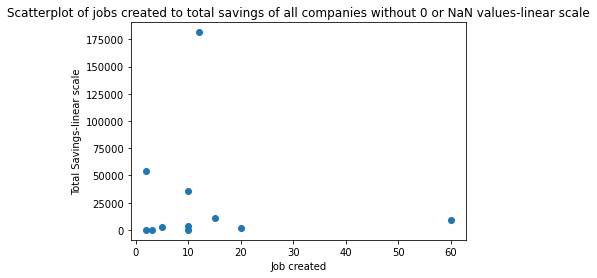

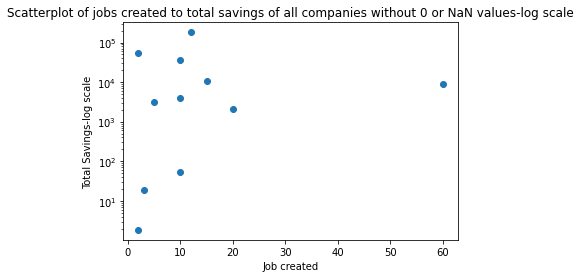

In [5]:
#assign x and y values for scatterplots

x = df1['Job created']
y = df1['Total Savings']

#scatterplot with linear scale

plt.scatter(x,y) 
plt.xlabel('Job created')
plt.ylabel('Total Savings-linear scale')
plt.title('Scatterplot of jobs created to total savings of all companies without 0 or NaN values-linear scale')
plt.yscale('linear')
plt.show()

#scatterplot with log scale
plt.scatter(x,y) 
plt.xlabel('Job created')
plt.ylabel('Total Savings-log scale')
plt.title('Scatterplot of jobs created to total savings of all companies without 0 or NaN values-log scale')
plt.yscale('log')
plt.show()

In [6]:
#histogram of the log of the average total savings

#assuming this is referring to day 4 results of NTAs with at least 5 companies

df_d4.head(5)

,NTA,Total Savings,Job created
0,Battery Park City-Lower Manhattan,469890.796667,NaN
1,Bushwick South,26140.455000,NaN
2,Carroll Gardens-Columbia Street-Red Hook,24337.390000,NaN
3,College Point,17159.372857,NaN
4,Crown Heights North,4036.298889,NaN


In [7]:
df_d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NTA            20 non-null     object 
 1   Total Savings  20 non-null     float64
 2   Job created    0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


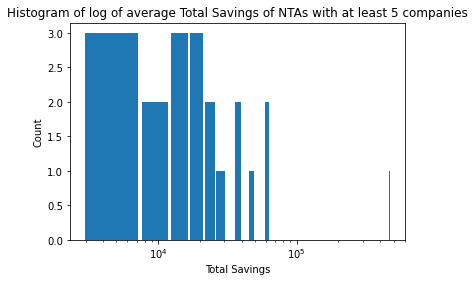

In [8]:
#assign value for histogram
x = df_d4['Total Savings']

plt.hist(x, bins = 100, rwidth=0.9,)
plt.xlabel('Total Savings')
plt.ylabel('Count')
plt.title('Histogram of log of average Total Savings of NTAs with at least 5 companies')
plt.xscale('log')
plt.show()


In [9]:
#line plot of the total jobs created for each month

#check out date formatting
df["Effective Date"]

0      03/04/2005
1      04/02/2008
2      01/05/2015
3      02/03/2020
4      06/30/2017
          ...    
445    12/09/2008
446    12/05/2017
447    08/03/2018
448    01/26/2016
449    10/03/2019
Name: Effective Date, Length: 450, dtype: object

In [10]:
#split the date to isolate month
split_date = df['Effective Date'].str.split("/")

#save month into new df_mo
df_mo = split_date.str.get(0)

df_mo.head()

0    03
1    04
2    01
3    02
4    06
Name: Effective Date, dtype: object

In [11]:
#create df_jc to store Job created column
df_jc = df['Job created']

df_jc.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Job created, dtype: float64

In [12]:
#concat df_mo and df_jc together and drop NaN values
df_concat = pd.concat({'month': df_mo, 'Job created': df_jc}, axis = 1).dropna()
df_concat.head(15)


,month,Job created
29,03,10.0
37,06,60.0
95,11,5.0
120,02,12.0
137,03,10.0
325,05,2.0
353,04,2.0
414,02,15.0
432,06,3.0
433,07,20.0


In [13]:
#sort df by month
df_sorted = df_concat.sort_values(by = ['month'])
df_sorted.head()


,month,Job created
120,02,12.0
414,02,15.0
29,03,10.0
137,03,10.0
353,04,2.0


In [14]:
#group by month
df_final = df_sorted.groupby('month').sum()

df_final.head()

,Job created
month,
02,27.0
03,20.0
04,2.0
05,2.0
06,63.0


In [15]:
#need to reset index
df_final.reset_index(inplace=True)

df_final.head()

,month,Job created
0,02,27.0
1,03,20.0
2,04,2.0
3,05,2.0
4,06,63.0


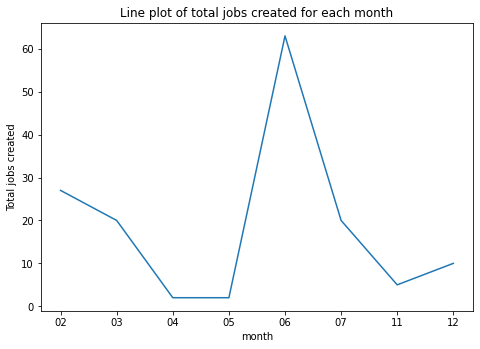

In [17]:
#create line plot of total jobs created for each month
#assign x and y values
x= df_final['month']
y= df_final['Job created']

#create line plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('month')
ax.set_ylabel('Total jobs created')
ax.set_title('Line plot of total jobs created per month')
plt.show()
